# Machine Learning - Supervised Learning a. Classification 
    • Project: Credit Risk Assessment 
        ○ Skills: Binary classification, model evaluation, handling imbalanced data
        ○ Tools: Scikit-learn, XGBoost, LightGBM


In [2]:
import warnings 
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

In [ ]:
%pip install pandas
import pandas as pd

%pip install sklearn
from sklearn.model_selection import train_test_split

%pip install matplotlib
import matplotlib.pyplot as plt

%pip install imblearn
# Import the necessary libraries
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import OneHotEncoder

# Handling missing values using an imputer
from sklearn.impute import SimpleImputer

#Checking for multicolinearity
%pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

%pip install seaborn
import seaborn as sns

# Logistic Regression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_curve, auc, f1_score, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score, roc_auc_score

%pip install xgboost
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV




|Feature Name	               |         Description                                |
|------------------------------|----------------------------------------------------|
|person_age	                   |         Age                                     
|person_income	               |         Annual Income
|person_home_ownership         |         Home ownership
|person_emp_length	           |         Employment length (in years)
|loan_intent	               |         Loan intent
|loan_amnt	                   |         Loan amount
|loan_int_rate	               |         Interest rate
|loan_status	               |         Loan status (0 is non default 1 is default)
|loan_percent_income	       |         Percent income
|cb_person_default_on_file	   |         Historical default
|cb_preson_cred_hist_length	   |         Credit history length

In [4]:
df = pd.read_csv("credit_risk_dataset.csv")
df.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [5]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [6]:
# Check missing values
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [7]:
# Handling missing values using an imputer
imputer = SimpleImputer(strategy='mean')  # You can choose 'mean', 'median', or 'most_frequent'

# Apply imputer only on 'person_emp_length' and 'loan_int_rate' columns
df[['person_emp_length', 'loan_int_rate']] = pd.DataFrame(
    imputer.fit_transform(df[['person_emp_length', 'loan_int_rate']]), 
    columns=['person_emp_length', 'loan_int_rate'])


In [8]:
# Check missing values
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [9]:
# Cases with persone age above 100 years( very rare cases)
df[df['person_age']>100]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,4800,13.570000,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,6000,11.860000,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,20400,10.250000,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,20000,11.011695,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,5000,12.730000,0,0.00,N,25


In [10]:
# Checking groups in home ownership
df['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [11]:
# Incorrect employment length above 50 years
df[df['person_emp_length']>50]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,20000,6.54,0,0.10,N,4


In [12]:
# Incorrect income, Above 2,000,000
df[df['person_income']>2000000]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
30049,42,2039784,RENT,0.0,VENTURE,8450,12.29,0,0.0,Y,15
32297,144,6000000,MORTGAGE,12.0,PERSONAL,5000,12.73,0,0.0,N,25


In [13]:
# Understanding cases of loan intent
df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [14]:
# Understanding cases of loan status 
df['loan_status'].unique()

array([1, 0])

In [15]:
# Cases of cb_person_default_on_file
df['cb_person_default_on_file'].unique()

array(['Y', 'N'], dtype=object)

In [16]:
# removing cases above 100 years
df2 = df[df['person_age']<100]

# removing incorrect employment length
df3 = df2[df2['person_emp_length']<60]

# Remove incorrect income
df4 = df3[df3['person_income']<2000000]

In [17]:
df4.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2


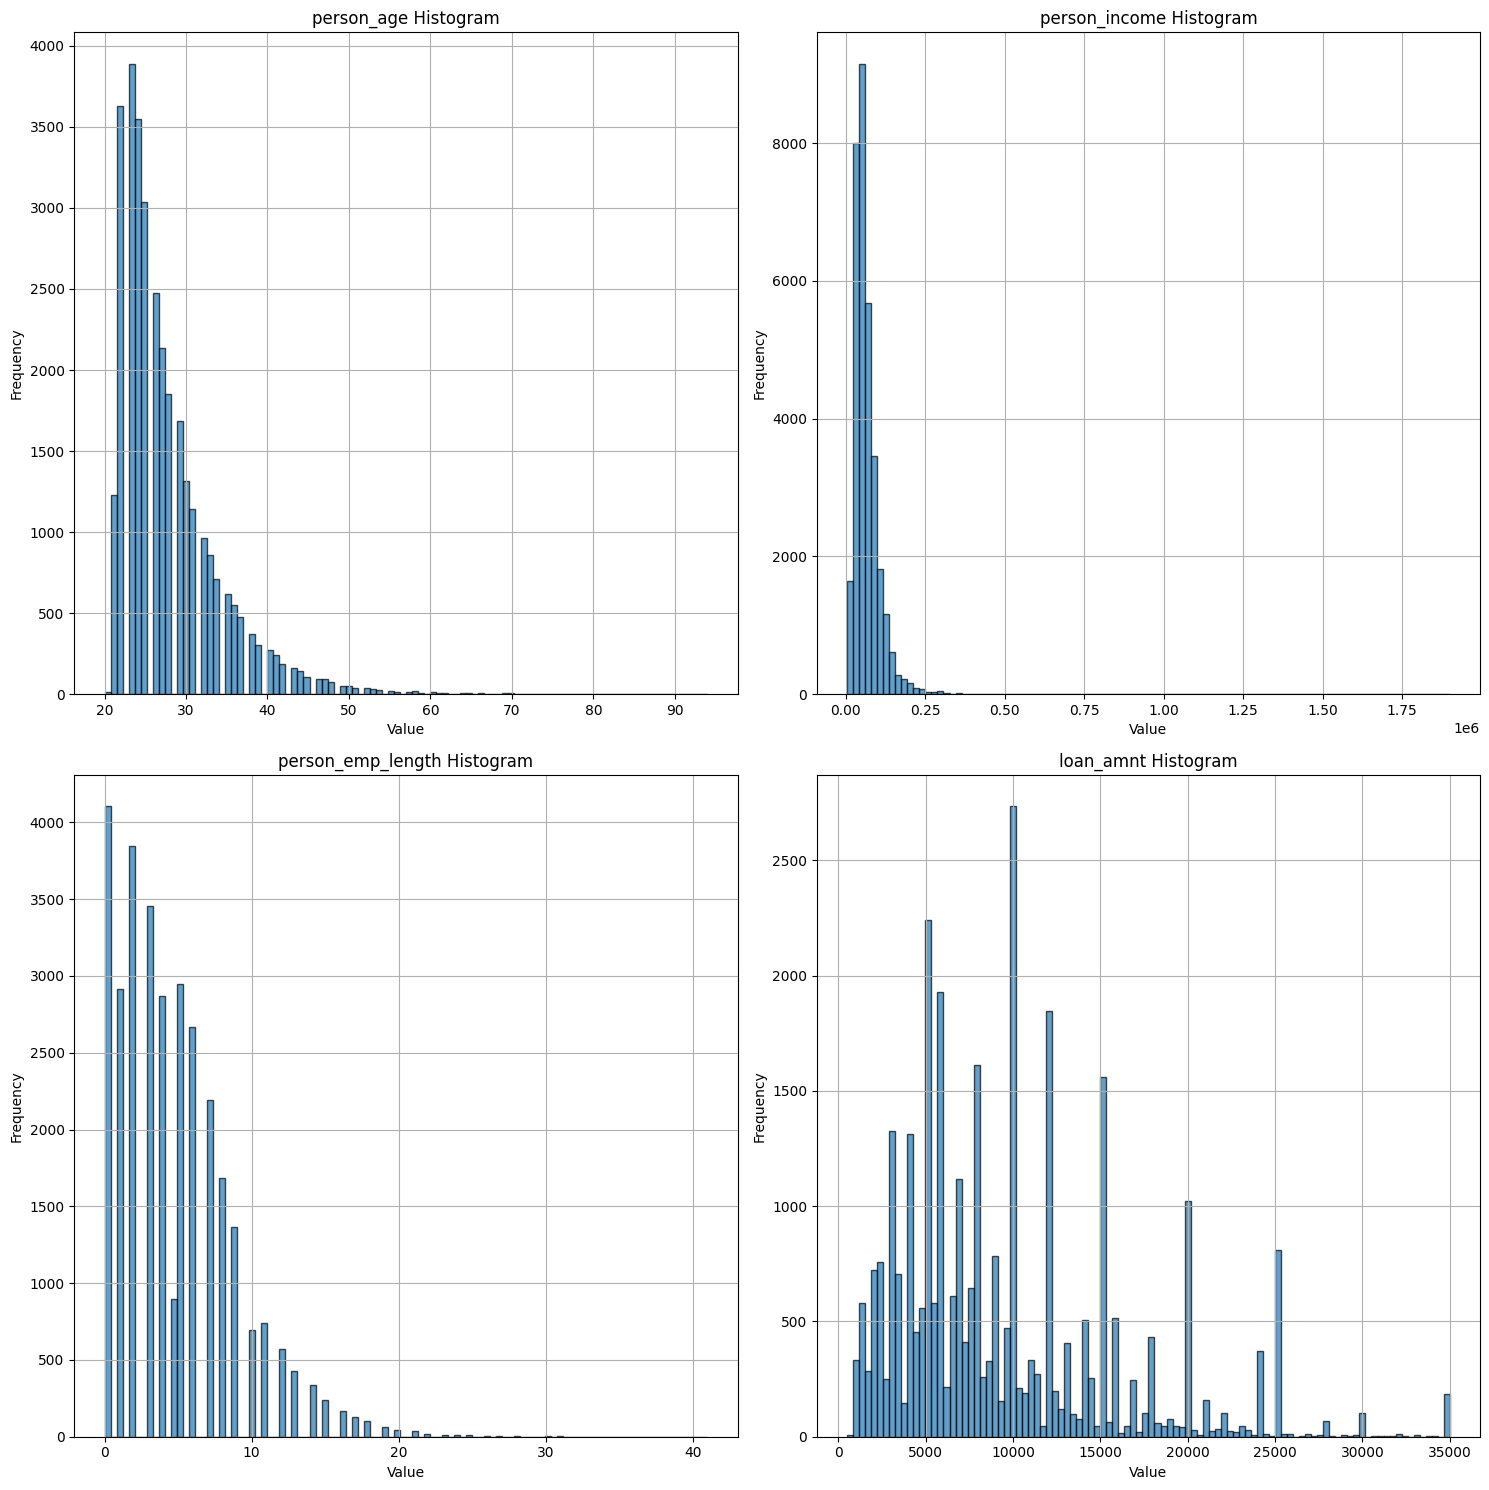

In [18]:
# --- Subplots ---
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# First subplot: Histogram for 'person_age'
axs[0, 0].hist(df4['person_age'], bins=100, edgecolor='black', alpha=0.7)
axs[0, 0].set_title('person_age Histogram')
axs[0, 0].set_xlabel('Value')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].grid(True)

# Second subplot: Histogram for 'person_income'
axs[0, 1].hist(df4['person_income'], bins=100, edgecolor='black', alpha=0.7)
axs[0, 1].set_title('person_income Histogram')
axs[0, 1].set_xlabel('Value')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].grid(True)

# Third subplot: You can plot another relevant variable, e.g., 'person_emp_length'
axs[1, 0].hist(df4['person_emp_length'], bins=100, edgecolor='black', alpha=0.7)
axs[1, 0].set_title('person_emp_length Histogram')
axs[1, 0].set_xlabel('Value')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].grid(True)

# Fourth subplot: Another variable, e.g., 'loan_amnt'
axs[1, 1].hist(df4['loan_amnt'], bins=100, edgecolor='black', alpha=0.7)
axs[1, 1].set_title('loan_amnt Histogram')
axs[1, 1].set_xlabel('Value')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].grid(True)

plt.tight_layout()  # Adjust subplots to fit into figure area
plt.show()


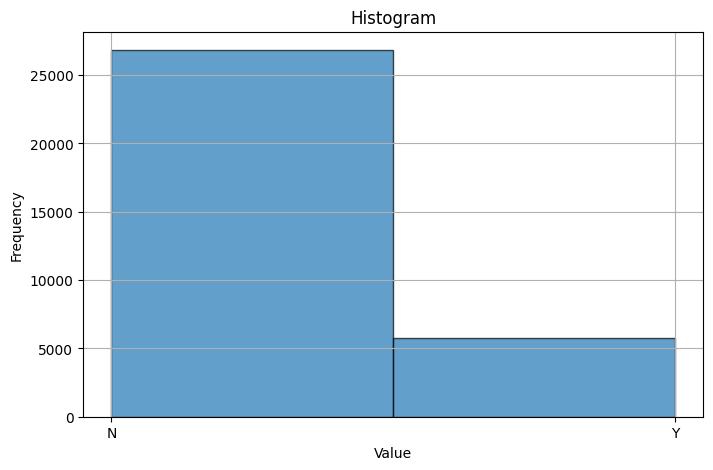

In [19]:
# looking at cb_person_default_on_file
plt.figure(figsize=(8, 5))
plt.hist(df4['cb_person_default_on_file'], bins=2, edgecolor='black', alpha=0.7)
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [20]:
# Count rows where cb_person_default_on_file == 'Y'
count_Y = df4[df4['cb_person_default_on_file'] == 'Y'].shape[0]

# Count rows where cb_person_default_on_file == 'N'
count_N = df4[df4['cb_person_default_on_file'] == 'N'].shape[0]

print(f"Number of rows with 'Y': {count_Y}")
print(f"Number of rows with 'N': {count_N}")


Number of rows with 'Y': 5743
Number of rows with 'N': 26830


This shows imbalance data. To deal with the imbalance data, we need to use:
- Metrics like Percision, Recall,F1 Score
- Over sampling or under sampling


### Over sampling the 'Y': 5627 Class
Random Oversampling: Randomly duplicate examples in the minority class.
In the first step we need to split data into train and test and then over sample train data to avoid ddata leakage. 
Almost all feature engineering like standardization, Normalisation etc should be done after the train test split.
Here is order of things:
1. Train and Test Split
2. One-Hot-Encoding
3. Over samoling of train data 

1. Train and Test Split

In [21]:
# Split Data into X and Y
X = df4.drop('cb_person_default_on_file', axis =1)
Y = df4['cb_person_default_on_file'] # traget variable

In [22]:
#Split The data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, shuffle=True, test_size= 0.2)

In [23]:
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
13153,24,110000,RENT,5.0,PERSONAL,12000,7.900000,0,0.11,2
27815,30,223800,MORTGAGE,15.0,HOMEIMPROVEMENT,25000,11.830000,1,0.11,9
22946,29,30000,RENT,5.0,HOMEIMPROVEMENT,8000,12.690000,1,0.27,6
6713,22,50000,OWN,2.0,EDUCATION,5600,11.860000,0,0.11,2
25339,28,25596,RENT,12.0,VENTURE,3000,11.011695,0,0.12,9


In [24]:
print(f"Number train data set: {X_train.shape[0]}")
print(f"Number test data set: {X_test.shape[0]}")

Number train data set: 26058
Number test data set: 6515


Scale X_train and X_test : This is important because many machine learning algorithms, including logistic regression, can be sensitive to the scale of the input features.
We are scaling them seperatly to avoid data leakage

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# List of numerical columns to scale
numeric_features = ['person_age', 'person_income', 'person_emp_length', 
                    'loan_amnt', 'loan_int_rate', 'loan_percent_income', 
                    'cb_person_cred_hist_length']
# Create a ColumnTransformer
ct = ColumnTransformer([
    ('scaler', StandardScaler(), numeric_features)
], remainder='passthrough')

# Fit the scaler on the training data and transform both train and test
X_train_scaled_array = ct.fit_transform(X_train)
X_test_scaled_array = ct.transform(X_test)

# Get the order of columns after transformation
scaled_columns = numeric_features
passthrough_columns = [col for col in X_train.columns if col not in numeric_features]
all_columns = scaled_columns + passthrough_columns

# Convert the scaled arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled_array, columns=all_columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled_array, columns=all_columns, index=X_test.index)


In [26]:
X_train_scaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership,loan_intent,loan_status
13153,-0.597806,0.863693,0.059747,0.38782,-1.011932,-0.560231,-0.934887,RENT,PERSONAL,0
27815,0.363993,3.084082,2.580464,2.451802,0.263817,-0.560231,0.782026,MORTGAGE,HOMEIMPROVEMENT,1
22946,0.203694,-0.697213,0.059747,-0.247251,0.542989,0.939291,0.046206,RENT,HOMEIMPROVEMENT,1
6713,-0.918405,-0.306986,-0.696468,-0.628294,0.273556,-0.560231,-0.934887,OWN,EDUCATION,0
25339,0.043394,-0.78314,1.824249,-1.04109,-0.001819,-0.466511,0.782026,RENT,VENTURE,0


2. One-Hot-Encoding

In [27]:
# One-hot encode the categorical variables in X_train_scaled and X_test_scaled
# We specify `sparse=False` to return a dense array
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform on train data
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train_scaled[['person_home_ownership', 'loan_intent']]), 
                               columns=encoder.get_feature_names_out())

# Transform test data (without fitting again)
X_test_encoded = pd.DataFrame(encoder.transform(X_test_scaled[['person_home_ownership', 'loan_intent']]), 
                              columns=encoder.get_feature_names_out())

# Drop original columns and concatenate encoded ones
X_train = X_train_scaled.drop(columns=['person_home_ownership', 'loan_intent']).reset_index(drop=True)
X_train = pd.concat([X_train, X_train_encoded], axis=1)

X_test = X_test_scaled.drop(columns=['person_home_ownership', 'loan_intent']).reset_index(drop=True)
X_test = pd.concat([X_test, X_test_encoded], axis=1)

In [28]:
X_train.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,-0.597806,0.863693,0.059747,0.38782,-1.011932,-0.560231,-0.934887,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.363993,3.084082,2.580464,2.451802,0.263817,-0.560231,0.782026,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.203694,-0.697213,0.059747,-0.247251,0.542989,0.939291,0.046206,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.918405,-0.306986,-0.696468,-0.628294,0.273556,-0.560231,-0.934887,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.043394,-0.78314,1.824249,-1.04109,-0.001819,-0.466511,0.782026,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
X_test.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,-0.437506,0.356399,-0.192325,-0.167867,-1.427443,-0.653951,-0.44434,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.277206,-0.697213,-0.444396,-0.326635,0.039831,0.751851,-0.689613,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.918405,0.210064,-0.696468,0.864124,-0.001819,0.28325,-0.44434,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.116906,-0.463077,-0.696468,-1.04109,-0.674329,-0.935112,-0.199067,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.043394,0.863772,-0.696468,0.864124,-0.001819,-0.279071,0.046206,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [30]:
# Convert Y_train and Y_test from 'Y'/'N' to 1/0
Y_train = Y_train.map({'Y': 1, 'N': 0}).reset_index(drop=True)
Y_test = Y_test.map({'Y': 1, 'N': 0}).reset_index(drop=True)

Yes ----> Person default on file ---->1

No ----> Person default on file ---->0

True positive -----> Correctly classified as default

False Positive ------> Incorrectly classified as default

True Negative -----> Correctly classified as non default

### False Negative -----> Incorrectly classified as non default (This is what we are mostly worried about in a default case)


In [31]:
Y_train

0        0
1        0
2        0
3        0
4        0
        ..
26053    0
26054    0
26055    0
26056    1
26057    0
Name: cb_person_default_on_file, Length: 26058, dtype: int64


To apply oversampling using SMOTE (Synthetic Minority Over-sampling Technique) on X_train and Y_train, you'll need to ensure that the categorical variables have been encoded and that SMOTE is applied only to the training set. SMOTE works by creating synthetic examples for the minority class, but it only works with numerical data.

In [32]:
# Apply SMOTE to oversample the minority class in the training set
smote = SMOTE(random_state=42)

# Ensure X_train is in numerical format 
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

In [33]:
# Number of data in each category after over sampling
sum(Y_train_resampled==1), sum(Y_train_resampled==0)

(21440, 21440)

The simplest method to detect multicollinearity in data is by using the Variance Inflation Factor (VIF). VIF measures the correlation between independent variables and quantifies the extent of this correlation. Also it is only applicable on numeric data

### Checking for multicolinearity

In [34]:

# columns to check VIF for
X = X_train_resampled[['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'loan_status', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE']]

#Create an empty dataframe
vif = pd.DataFrame()

#copy features of x in datafram
vif["features"] =  X.columns

#change data format to numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Calculate VIF for all the variables
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [35]:
vif

,features,VIF Factor
0,person_age,4.844313
1,person_income,1.990044
2,person_emp_length,1.115107
3,loan_amnt,2.945042
4,loan_int_rate,1.177456
5,loan_percent_income,3.023473
6,cb_person_cred_hist_length,4.788809
7,loan_status,1.445109
8,person_home_ownership_MORTGAGE,inf
9,person_home_ownership_OTHER,inf


vif for cb_person_cred_hist_length, person_age is high, lets check correlation matrix too

In [36]:
corr_matrix = X_train_resampled.corr()

<Axes: >

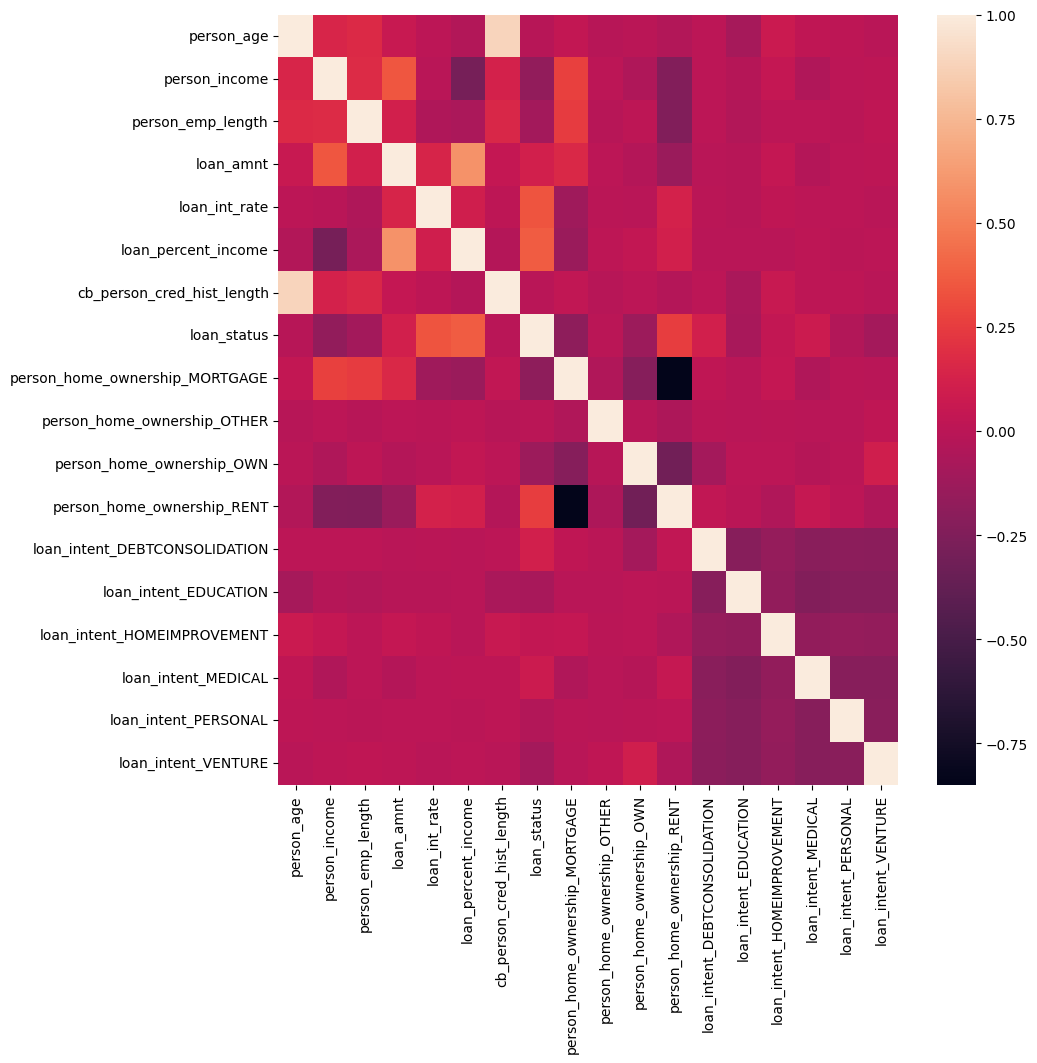

In [37]:
#set figure size
plt.figure(figsize=(10,10))

# Plot correlation heatmap
sns.heatmap(corr_matrix)

We dont see much correlation other than persone age with persone credit history which makes sense.

Now our train data set is ready for modeling. I will be using Logistic regression, Random Forest and XGBoost for classification. I'll be comparing F1 score, AUC and False negative rate which is imporatnt for credit risk default. Note that regularization is applied by default. L2 is the default

Logistic Rgeression

In [38]:
# Create the LogisticRegression object with a higher max_iter
lor = LogisticRegression(max_iter=5000)  # You can adjust this number as needed

# Fit the model
lor.fit(X_train_resampled, Y_train_resampled)

LogisticRegression(max_iter=5000)

In [39]:
y_pred = lor.predict(X_test)

Calculating accuracy metrics:

In [40]:
# Get prediction probabilities for ROC curve
y_pred_proba = lor.predict_proba(X_test)[:, 1]

In [41]:
# predict_proba returns the probability of each class. so the sum of each row in this is going to be 1. We need probability of 
lor.predict_proba(X_test)

array([[0.98378232, 0.01621768],
       [0.71426047, 0.28573953],
       [0.74803367, 0.25196633],
       ...,
       [0.62313795, 0.37686205],
       [0.91341645, 0.08658355],
       [0.9804903 , 0.0195097 ]])

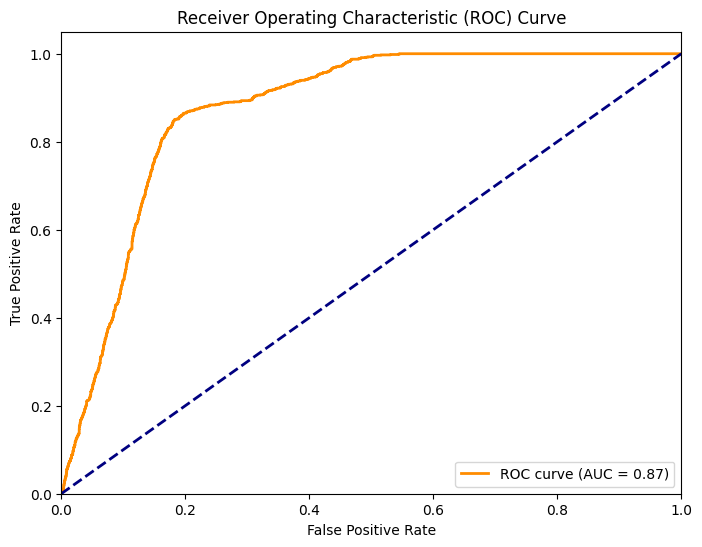

F1 Score: 0.6176
False Negative Rate: 0.1422


In [42]:
# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate F1 score
f1 = f1_score(Y_test, y_pred)

# Calculate confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Calculate False Negative Rate
fn = cm[1][0]  # False negatives
tp = cm[1][1]  # True positives
fnr = fn / (fn + tp)

print(f"F1 Score: {f1:.4f}")
print(f"False Negative Rate: {fnr:.4f}")

AUC (Area Under the ROC Curve): 0.87

This is an excellent score. The AUC ranges from 0 to 1, where 1 is perfect prediction and 0.5 is no better than random guessing.
A score of 0.87 indicates that your model has a strong ability to distinguish between the positive class (likely loan defaults) and the negative class (likely non-defaults).
Generally, 0.8-0.9 is considered excellent discrimination.


F1 Score: 0.5983

The F1 score is the harmonic mean of precision and recall, ranging from 0 (worst) to 1 (best).
A score of 0.5983 suggests moderate performance. It's above 0.5, which is good, but there's room for improvement.
This score indicates a reasonable balance between precision (minimizing false positives) and recall (minimizing false negatives), but not outstanding in either.


False Negative Rate (FNR): 0.1503

This means that about 15.03% of actual positive cases (likely actual defaults) were incorrectly classified as negative (predicted to not default).
In the context of credit risk assessment, false negatives are often considered more costly than false positives, as they represent loans that the model predicted would be repaid but actually defaulted.
A 15.03% FNR isn't terrible, but in credit risk assessment, you might want to reduce this further if possible.

### Using cross-validation to ensure these results are stable across different subsets of your data.

In [43]:
# Create the LogisticRegression object
lor = LogisticRegression(max_iter=5000)

# Define the number of folds
n_folds = 5

# Create a StratifiedKFold object. This cross-validation object is a variation of KFold that returns stratified folds. 
# The folds are made by preserving the percentage of samples for each class.
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Define scoring metrics. We want to have 3 scoring metrics
scoring = {
    'AUC': 'roc_auc',
    'F1': 'f1',
    'Accuracy': 'accuracy',
    'Recall' : 'recall' #larger recall smaller false negative TP/(TP+FN)
}



In [44]:
# Perform cross-validation using cross_validate (which supports multiple metrics)
cv_results = cross_validate(lor, X_train_resampled, Y_train_resampled, cv=skf, scoring=scoring, return_train_score=False)

In [45]:
cv_results

{'fit_time': array([0.1195991 , 0.10158491, 0.08406234, 0.10129142, 0.09096575]),
 'score_time': array([0.03103447, 0.04357266, 0.03400373, 0.03195548, 0.05240583]),
 'test_AUC': array([0.87587538, 0.87296312, 0.87721026, 0.88018224, 0.86906693]),
 'test_F1': array([0.83579731, 0.82938442, 0.83466337, 0.83946981, 0.83216941]),
 'test_Accuracy': array([0.83034049, 0.82451026, 0.82847481, 0.83477146, 0.82625933]),
 'test_Recall': array([0.86357276, 0.85307836, 0.86590485, 0.86403918, 0.86147388])}

AUC: 0.8751 (+/- 0.0076)
F1 Score: 0.8343 (+/- 0.0068)
Accuracy: 0.8289 (+/- 0.0071)
Recall: 0.8616 (+/- 0.0090)


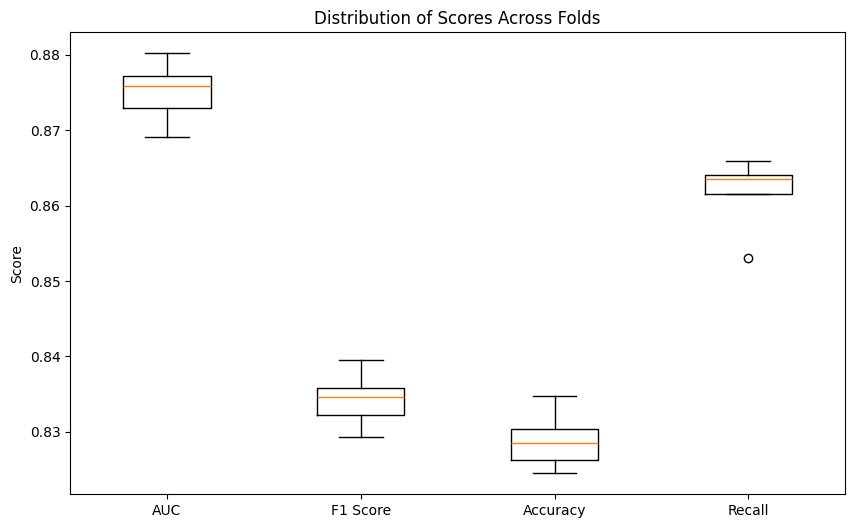

In [46]:

# Print results
print(f"AUC: {cv_results['test_AUC'].mean():.4f} (+/- {cv_results['test_AUC'].std() * 2:.4f})")
print(f"F1 Score: {cv_results['test_F1'].mean():.4f} (+/- {cv_results['test_F1'].std() * 2:.4f})")
print(f"Accuracy: {cv_results['test_Accuracy'].mean():.4f} (+/- {cv_results['test_Accuracy'].std() * 2:.4f})")
print(f"Recall: {cv_results['test_Recall'].mean():.4f} (+/- {cv_results['test_Recall'].std() * 2:.4f})")

# Plot the distribution of scores
plt.figure(figsize=(10, 6))
plt.boxplot([cv_results['test_AUC'], cv_results['test_F1'],cv_results['test_Accuracy'], cv_results['test_Recall']], 
            labels=['AUC', 'F1 Score', 'Accuracy','Recall'])
plt.title('Distribution of Scores Across Folds')
plt.ylabel('Score')
plt.show()

#### XGBoost

Lets see if we can improve accuracy using XGBoost

#### A little about XGboost

Boosting algorithms are methods designed to improve the performance of weak learners by combining them into a stronger model. Some examples are: XGBoost, LightGBM, and AdaBoost 

AdaBoost: It operates by sequentially training a series of weak learners and assigning higher weights to misclassified samples in each iteration.

XGBoost: XGBoost introduces regularization techniques, parallel processing, and tree-pruning algorithms to achieve high accuracy and speed.

LightGBM: It adopts a histogram-based learning approach, discretizing continuous features into discrete bins during training.

#### XGBoost Framework

1. Initialization:
Begin with a base model that makes simple predictions (e.g., mean for regression, mode for classification) to serve as the starting point.

2. Iterative Improvement:
Sequentially add weak learners (e.g., decision trees) to improve predictions. After each step, residuals or errors are calculated based on the difference between predicted and actual values.

3. Gradient Descent Step:
Compute the negative gradient of the loss function to guide the updates, then fit a new weak learner to these gradients.

4. Update with Learning Rate:
Scale new predictions by a learning rate and add them to the previous model. The learning rate controls the pace of learning and helps prevent overfitting.

5. Regularization:
Apply methods like limiting tree depth, setting minimum samples per leaf, or adjusting the number of iterations to prevent overfitting.

6. Stopping Criteria:
Stop adding trees after a set number of iterations or when improvements fall below a certain threshold.

In [47]:
#Creating an XGBoost classifier
XGBModel = xgb.XGBClassifier()

X_train_resampled = X_train_resampled.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Training model
XGBModel.fit(X_train_resampled,Y_train_resampled)


# Test
XGBPredictions = XGBModel.predict(X_test)

In [48]:
#Calculating accuracy
accuracy = accuracy_score(Y_test, XGBPredictions)

print("Accuracy:", accuracy)


Accuracy: 0.827014581734459


#### Fine tuning XGBoost

To fine-tune your XGBoost classification model, you can optimize its hyperparameters, which control the behavior of the model and impact its performance. Here are some common hyperparameters you can adjust:

#### 1. Key Hyperparameters to Tune:

n_estimators: The number of trees in the model (higher values may lead to better performance but can cause overfitting).

learning_rate: Step size shrinkage to prevent overfitting (values between 0.01 and 0.3 work well).

max_depth: Maximum depth of a tree (controls model complexity, usually between 3 and 10).

min_child_weight: Minimum sum of instance weight (hessian) needed in a child (controls overfitting).

subsample: Percentage of samples used per tree (usually between 0.5 and 1).

colsample_bytree: Fraction of features used per tree (usually between 0.5 and 1).

gamma: Minimum loss reduction to make a split (larger values lead to more conservative models).

reg_alpha and reg_lambda: Regularization terms to prevent overfitting.

#### 2. Grid Search for Hyperparameter Tuning:

You can use GridSearchCV to automate the tuning of hyperparameters. Lets use sklearn's GridSearchCV:

In [49]:
# Set up parameter grid
param_grid = {
    'n_estimators': [100, 200, 300], 
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1],
    'gamma': [0, 0.1, 0.5],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}


In [ ]:
# Set up GridSearchCV: Exhaustive search over specified parameter values for an estimator.
# Set different scoring methods from here: https://scikit-learn.org/dev/modules/model_evaluation.html#scoring-parameter
# n_jobs : -1 means using all processors
# CV: cross varidation strategy

grid_search = GridSearchCV(estimator = XGBModel, param_grid= param_grid, scoring='roc_auc', cv=5, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_resampled, Y_train_resampled)

This step takes some time, you can always use RandomizedSearchCV from sklearn.model_selection if you want faster tuning.

In [53]:
# Randomize search samples a fixed number of parameter combinations
random_search = RandomizedSearchCV(estimator= XGBModel, param_distributions=param_grid, n_iter=50, scoring='roc_auc',cv=5, random_state=42, n_jobs=-1)

random_search.fit(X_train_resampled, Y_train_resampled, )

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1],
                                        'gamma': [0, 0.1, 0.5],
                                        'learning_rate': [0.01, 0.1, 0.3],
                                        'max_depth': [3, 5, 7],
                                        'min_child_weight': [1, 5, 10],
                                        'n_estimators': [100, 200, 300],
                                        'reg_alpha': [0, 0.01, 0.1],
                                        'reg_lambda': [1, 1.5, 2],
                                        'subsample': [0.5, 0.7, 1]},
                   random_state=42, scoring='roc_auc')

Now we are going to use the best parameters to fit our model.

In [54]:
# Get best parameters:
best_params = random_search.best_params_
print(f"best parameters are: {best_params}")

best parameters are: {'subsample': 0.7, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.5}


And now we have to tune our model with the best parameters found:

In [56]:
XGBModel_Tunned = xgb.XGBClassifier(**best_params)
XGBModel_Tunned.fit(X_train_resampled, Y_train_resampled)

# Test the tunned model
XGBPrediction_Tuned = XGBModel_Tunned.predict(X_test)

In [57]:
#Calculating accuracy
accuracy = accuracy_score(Y_test, XGBPrediction_Tuned)

print("Accuracy:", accuracy)

Accuracy: 0.8302379125095932


Accuraccy improved a little, lets look at the cross validation:

Note to myself:  looking at feature importance.  cutting out un necessary features.